In [ ]:
!pip install windrose openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import math

# Dataset

La estación 109 esta en las coordenadas (-8725813.90807, 281580.567029), la granularidad de tiempo es a 1 hora.

- timewind: Tiempo (horas)
- ts50_pressure: Presión atmosférica (Pascal)
- ts50_temperature: Temperatura (kelvin) 
- ts50_winddirection: Direccion del viento (grados)
- ts50_windspeed: velocidad viento (km/h)

- ts120_pressure: Presión atmosférica (Pascal)
- ts120_temperature: Temperatura (kelvin)
- ts120_winddirection: Direccion del viento (grados)
- ts120_windspeed: velocidad viento (km/h)

- stations_id: Identificador de la estación



In [3]:
df = pd.read_csv('serieWind109.csv', sep=';')

In [4]:
df.head()

,timewind,ts50_pressure,ts50_temperature,ts50_winddirection,ts50_windspeed,ts120_pressure,ts120_temperature,ts120_winddirection,ts120_windspeed,stations_id
0,2000-01-01 00:00:00,100702.0,297.53,257.16,7.43,100702.0,297.53,257.13,8.42,109
1,2000-01-01 01:00:00,100782.0,297.42,252.07,7.06,100782.0,297.42,252.37,8.00,109
2,2000-01-01 02:00:00,100831.0,297.34,247.70,6.89,100831.0,297.34,248.12,7.79,109
3,2000-01-01 03:00:00,100842.0,297.24,243.77,6.94,100842.0,297.24,244.25,7.84,109
4,2000-01-01 04:00:00,100865.0,297.12,239.77,6.78,100865.0,297.12,240.29,7.65,109


In [5]:
df['timewind'] = pd.to_datetime(df['timewind'])

In [6]:
df['year'] = df.timewind.dt.year
df['month'] = df.timewind.dt.month
df['day'] = df.timewind.dt.day

In [7]:
df = df.set_index('timewind')

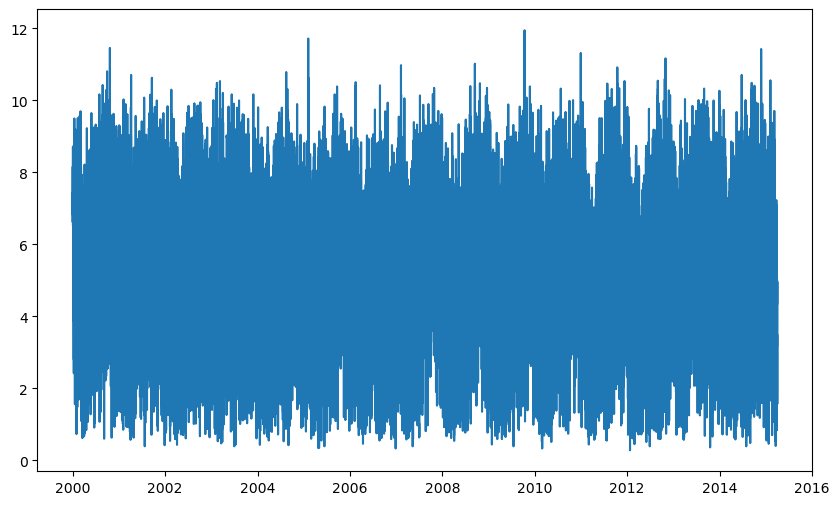

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df.ts50_windspeed)
plt.show()

## 2014

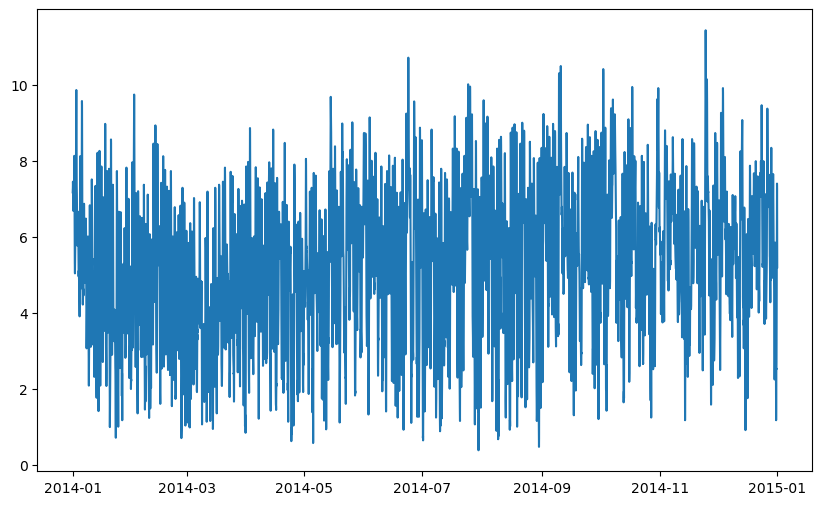

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df[df.year.isin([2014])].ts50_windspeed)
plt.show()

## Year 2014 - Month 08

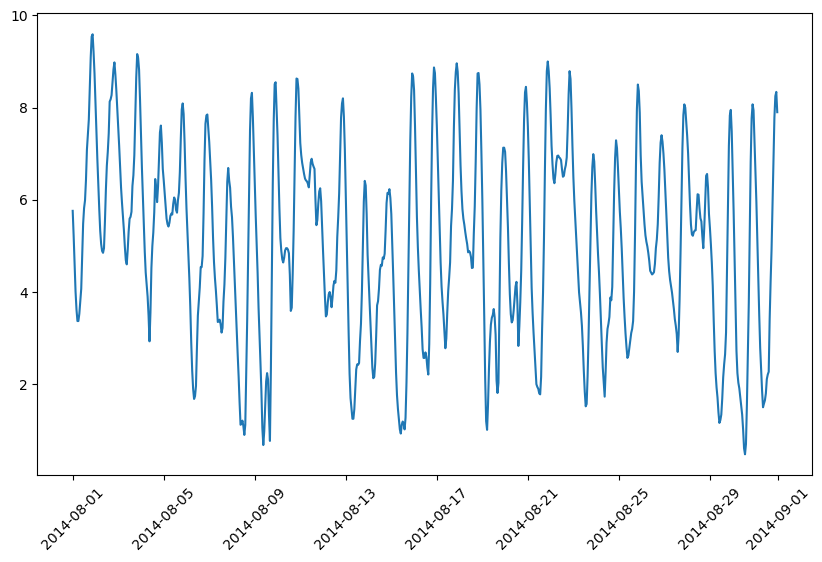

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
df_filter = df[ (df.year.isin([2014])) & (df.month == 8)]

ax.plot( df_filter.ts50_windspeed)
plt.xticks( rotation=45 )
plt.show()

In [11]:
df_filter.ts50_windspeed.max()

9.59

In [12]:
df_filter.ts50_windspeed.min()

0.48

# Histograma de la velocidad del viento

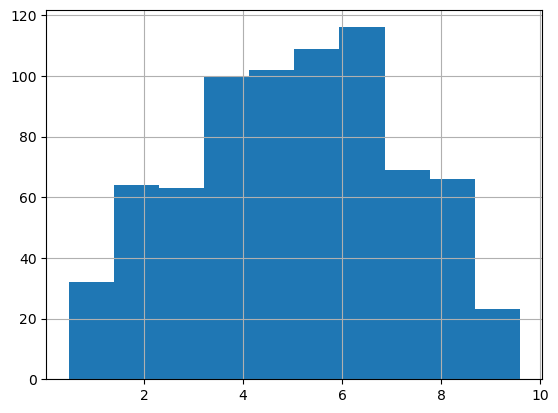

In [13]:
df_filter.ts50_windspeed.hist()
plt.show()

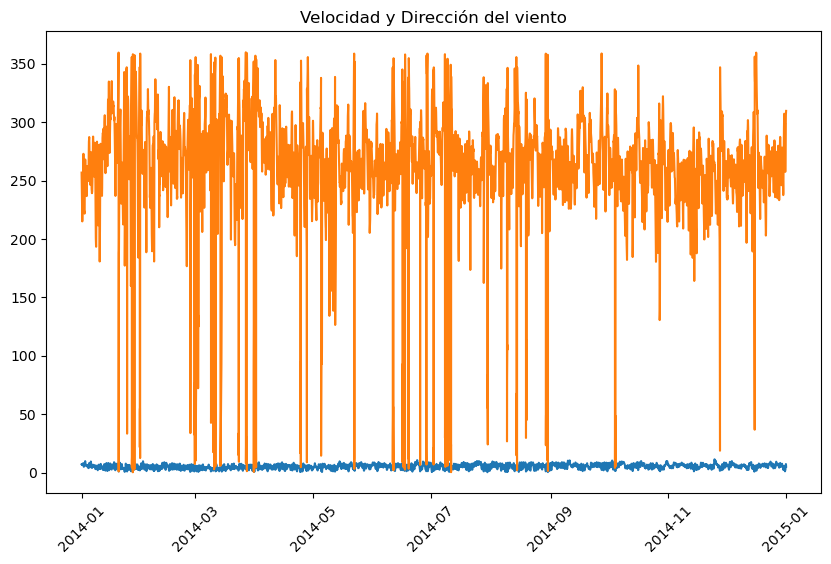

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
df_filter = df[ (df.year.isin([2014]))]

plt.title("Velocidad y Dirección del viento" ) 
ax.plot( df_filter.ts50_windspeed)
ax.plot( df_filter.ts50_winddirection)
plt.xticks( rotation=45 )
plt.show()

## WindRose

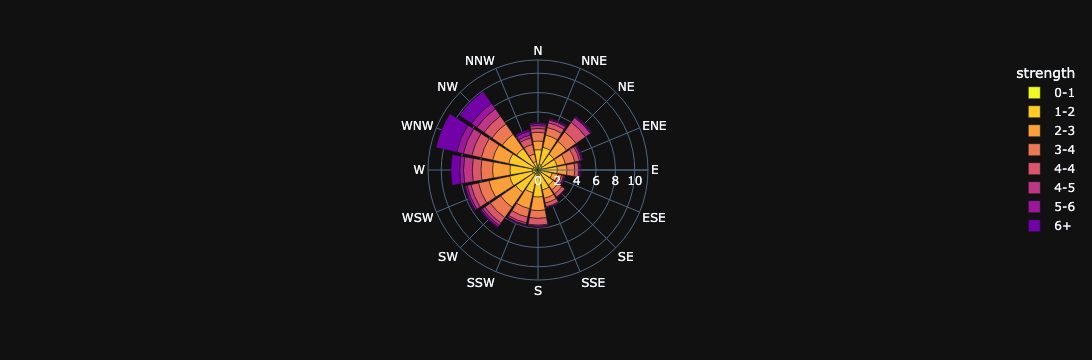

In [19]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## Descomposición de la velocidad en los ejes X, Y

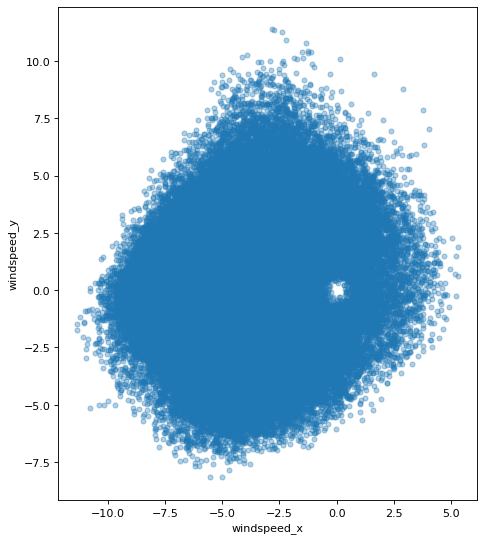

In [15]:
df['windspeed_x'] = df['ts50_windspeed'] * np.sin(df['ts50_winddirection'] * math.pi / 180.0)
df['windspeed_y'] = df['ts50_windspeed'] * np.cos(df['ts50_winddirection'] * math.pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='windspeed_x', y='windspeed_y', alpha=0.35, ax=ax)